## Importing libraries

In [1]:
import pandas as pd
import numpy as np

import time
from tqdm import tqdm_notebook

In [2]:
import glob

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [5]:
from fbprophet import Prophet

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [6]:
pd.plotting.register_matplotlib_converters()

In [8]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [14]:
import pickle

## Borough predictions

In [12]:
def make_prediction_for_borough(boro, model,date1='2018-12-01', date2 = '2018-12-08',  show_components = False):
    num_pounts_to_pred = int((pd.to_datetime(date2)-pd.to_datetime(date1))/np.timedelta64(1, 'h'))
        
    sub_df = boro[(boro.ds < date2) & (boro.ds > date1)]
    
    forecast = model.predict(sub_df)
    forecast = forecast[-num_pounts_to_pred:]
    
    if show_components:
        model.plot_components(forecast)
    
    model.plot(forecast)
    plt.plot(forecast.ds, forecast.yhat, 'x-', label = 'forecast')
    plt.plot(sub_df.ds, sub_df.y, '-', label = 'truth')
    
    plt.xlim(date1,date2)
    plt.ylim(bottom=0, top = max(sub_df.y)*1.1)
    plt.title('Forecast ')
    plt.xlabel('Time range')
    plt.ylabel('Taxi pickup demand')
    plt.legend()
    return plt.show()

### Demand

#### Manhattan

In [15]:
pkl_path = "./models/manhattan.pkl"
with open(pkl_path, 'rb') as f:
    manhattan_model = pickle.load(f)

In [17]:
manhattan_demand_exog = pd.read_csv("./models/manhattan_demand_exog.csv", parse_dates = ['ds'])

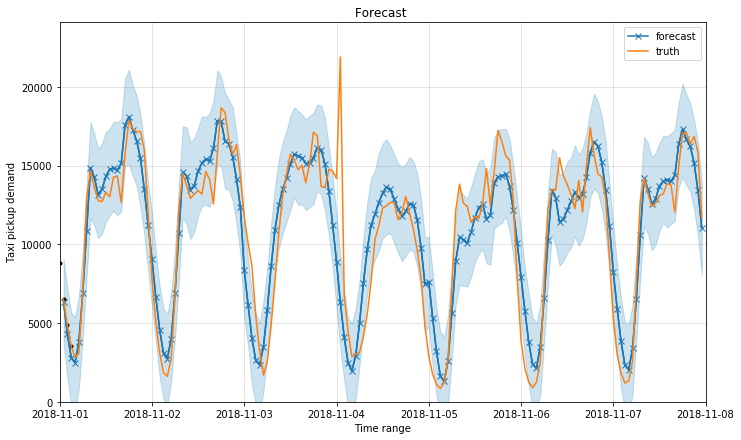

In [19]:
make_prediction_for_borough(manhattan_demand_exog, manhattan_model,date1='2018-11-01', date2 = '2018-11-08')

#### Brooklyn

In [20]:
pkl_path = "./models/brooklyn.pkl"
with open(pkl_path, 'rb') as f:
    brooklyn_model = pickle.load(f)

In [21]:
brooklyn_demand_exog = pd.read_csv("./models/brooklyn_demand_exog.csv", parse_dates = ['ds'])

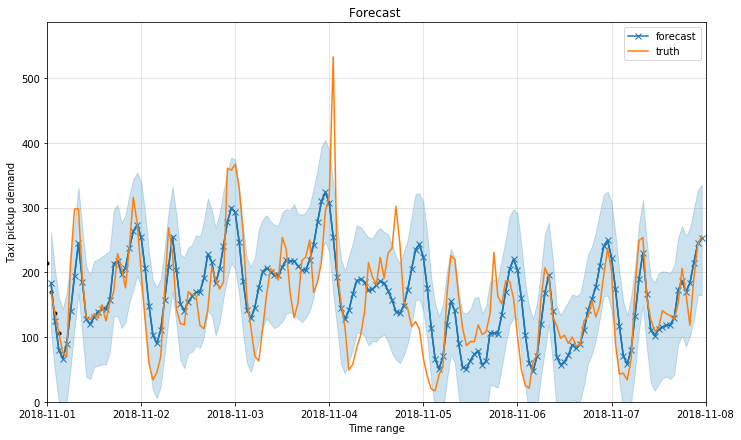

In [22]:
make_prediction_for_borough(brooklyn_demand_exog, brooklyn_model,date1='2018-11-01', date2 = '2018-11-08')

#### Queens

In [29]:
pkl_path = "./models/queens.pkl"
with open(pkl_path, 'rb') as f:
    queens_model = pickle.load(f)

In [30]:
queens_demand_exog = pd.read_csv("./models/queens_demand_exog.csv", parse_dates = ['ds'])

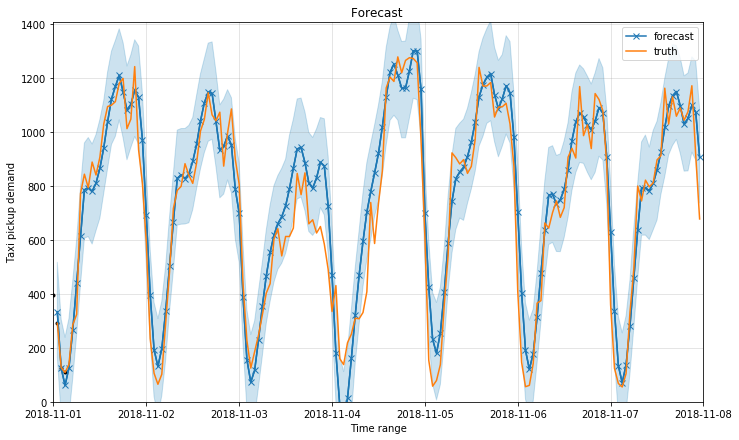

In [31]:
make_prediction_for_borough(queens_demand_exog, queens_model,date1='2018-11-01', date2 = '2018-11-08')

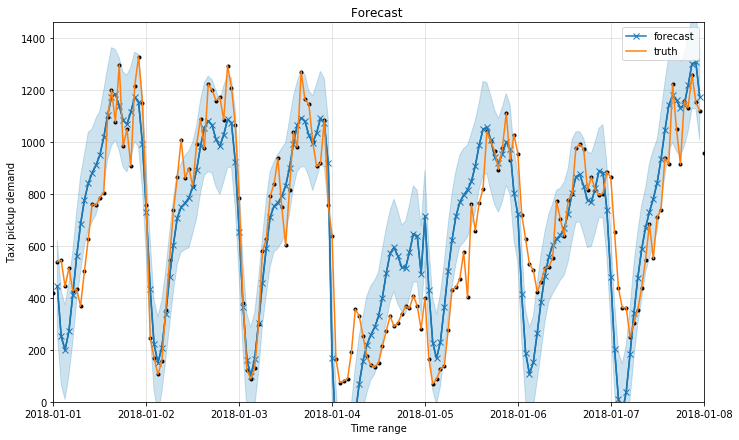

In [37]:
make_prediction_for_borough(queens_demand_exog, queens_model,date1='2018-01-01', date2 = '2018-01-08')

#### Bronx

In [32]:
pkl_path = "./models/bronx.pkl"
with open(pkl_path, 'rb') as f:
    bronx_model = pickle.load(f)

In [33]:
bronx_demand_exog = pd.read_csv("./models/bronx_demand_exog.csv", parse_dates = ['ds'])

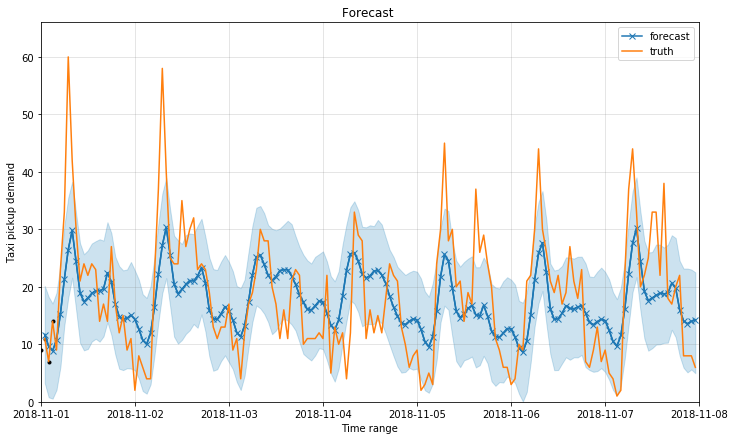

In [34]:
make_prediction_for_borough(bronx_demand_exog, bronx_model,date1='2018-11-01', date2 = '2018-11-08')

### Fare

#### Manhattan

In [38]:
pkl_path = "./models/manhattan_fare.pkl"
with open(pkl_path, 'rb') as f:
    manhattan_fare_model = pickle.load(f)

In [39]:
manhattan_fare_exog = pd.read_csv("./models/manhattan_fare_exog.csv", parse_dates = ['ds'])

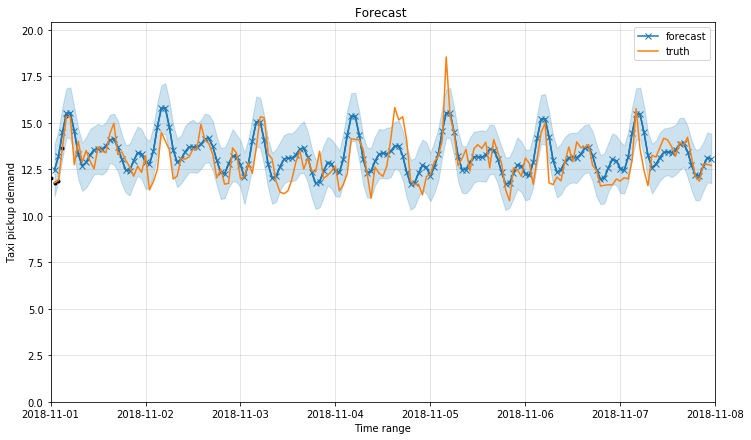

In [41]:
make_prediction_for_borough(manhattan_fare_exog, manhattan_fare_model,date1='2018-11-01', date2 = '2018-11-08')

#### Brooklyn

In [42]:
pkl_path = "./models/brooklyn_fare.pkl"
with open(pkl_path, 'rb') as f:
    brooklyn_fare_model = pickle.load(f)

In [43]:
brooklyn_fare_exog = pd.read_csv("./models/brooklyn_fare_exog.csv", parse_dates = ['ds'])

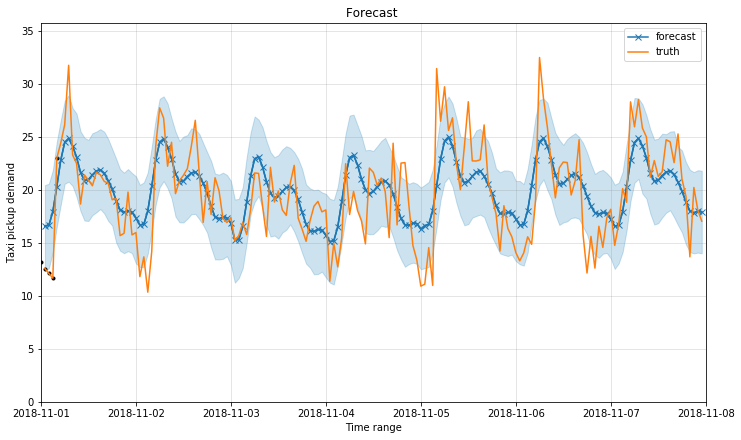

In [44]:
make_prediction_for_borough(brooklyn_fare_exog, brooklyn_fare_model,date1='2018-11-01', date2 = '2018-11-08')

#### Queens

In [45]:
pkl_path = "./models/queens_fare.pkl"
with open(pkl_path, 'rb') as f:
    queens_fare_model = pickle.load(f)

In [46]:
queens_fare_exog = pd.read_csv("./models/queens_fare_exog.csv", parse_dates = ['ds'])

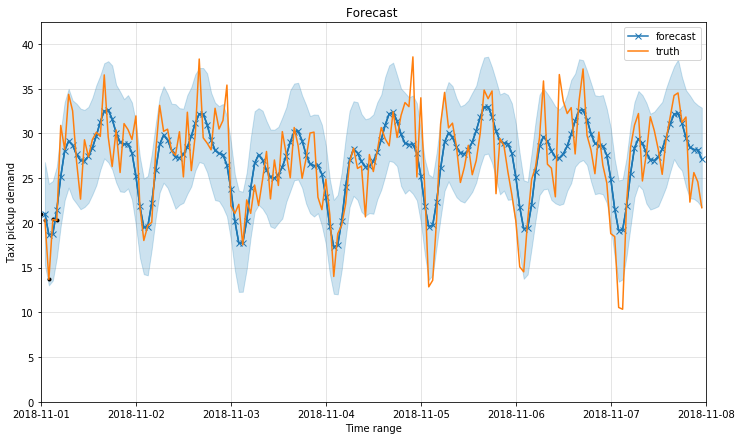

In [47]:
make_prediction_for_borough(queens_fare_exog, queens_fare_model,date1='2018-11-01', date2 = '2018-11-08')

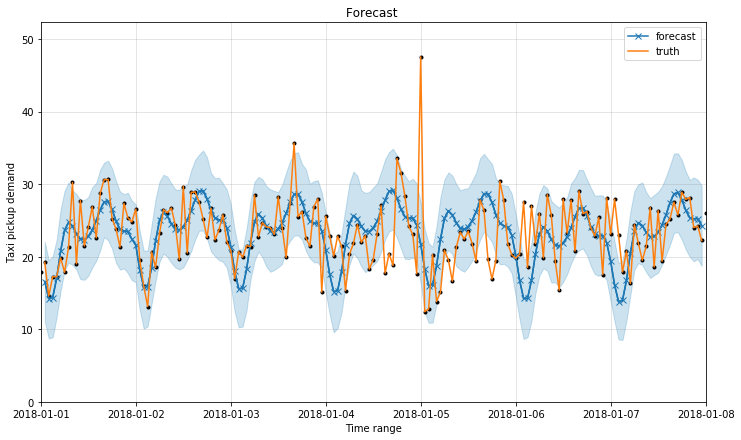

In [51]:
make_prediction_for_borough(queens_fare_exog, queens_fare_model,date1='2018-01-01', date2 = '2018-01-08')

#### Bronx

In [48]:
pkl_path = "./models/bronx_fare.pkl"
with open(pkl_path, 'rb') as f:
    bronx_fare_model = pickle.load(f)

In [49]:
bronx_fare_exog = pd.read_csv("./models/bronx_fare_exog.csv", parse_dates = ['ds'])

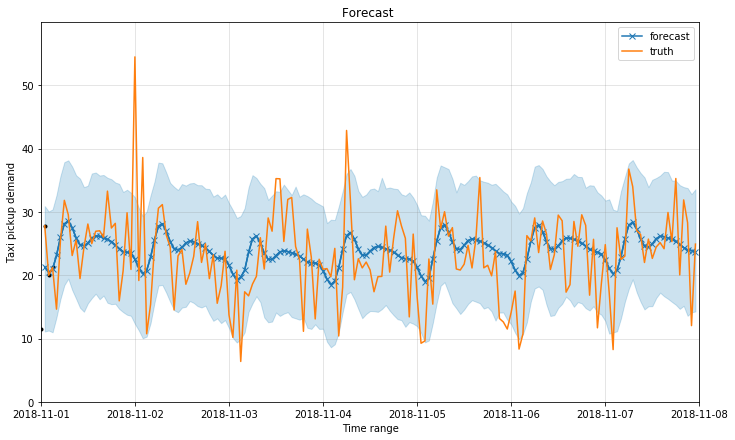

In [50]:
make_prediction_for_borough(bronx_fare_exog, bronx_fare_model,date1='2018-11-01', date2 = '2018-11-08')

### Tips by borough

#### Manhattan

In [52]:
pkl_path = "./models/manhattan_tips.pkl"
with open(pkl_path, 'rb') as f:
    manhattan_tips_model = pickle.load(f)

In [53]:
manhattan_tips_exog = pd.read_csv("./models/manhattan_tips_exog.csv", parse_dates = ['ds'])

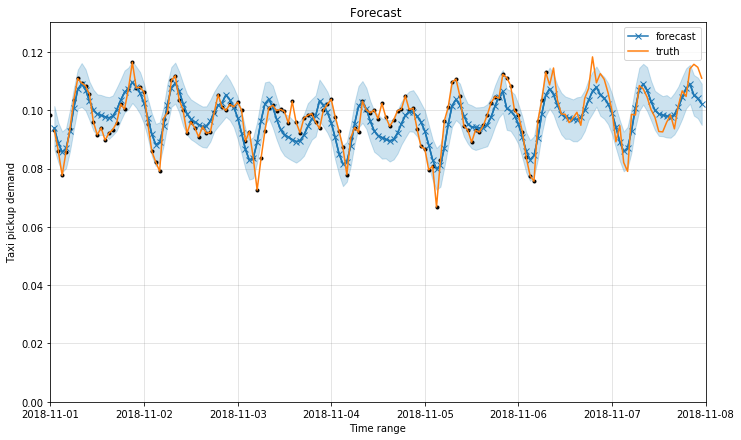

In [55]:
make_prediction_for_borough(manhattan_tips_exog, manhattan_tips_model,date1='2018-11-01', date2 = '2018-11-08')

#### Brooklyn

In [56]:
pkl_path = "./models/brooklyn_tips.pkl"
with open(pkl_path, 'rb') as f:
    brooklyn_tips_model = pickle.load(f)

In [57]:
brooklyn_tips_exog = pd.read_csv("./models/brooklyn_tips_exog.csv", parse_dates = ['ds'])

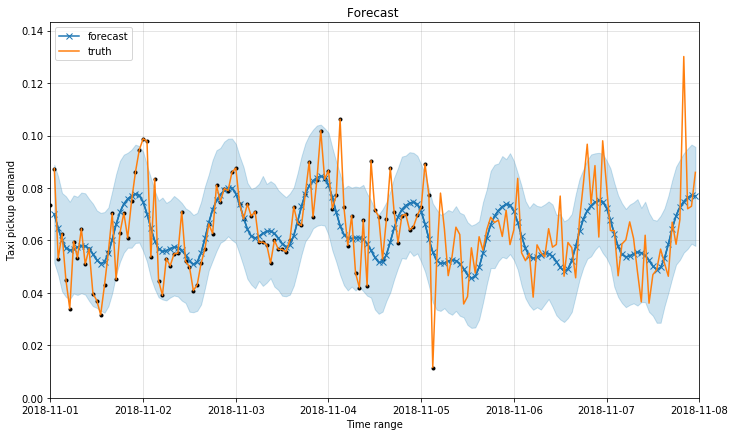

In [58]:
make_prediction_for_borough(brooklyn_tips_exog, brooklyn_tips_model,date1='2018-11-01', date2 = '2018-11-08')

#### Queens

In [59]:
pkl_path = "./models/queens_tips.pkl"
with open(pkl_path, 'rb') as f:
    queens_tips_model = pickle.load(f)

In [60]:
queens_tips_exog = pd.read_csv("./models/queens_tips_exog.csv", parse_dates = ['ds'])

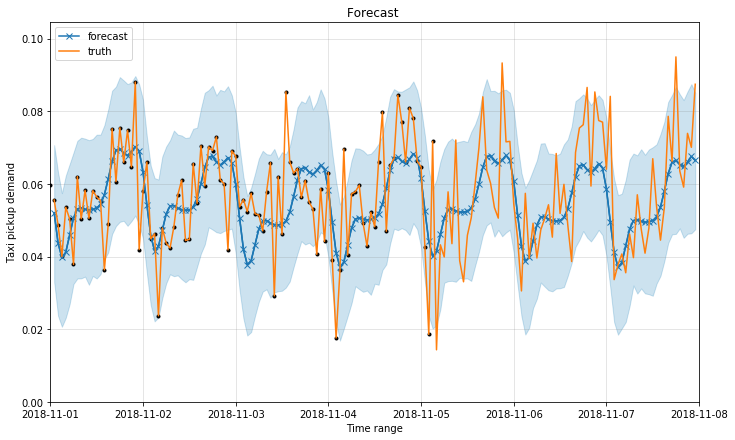

In [61]:
make_prediction_for_borough(queens_tips_exog, queens_tips_model,date1='2018-11-01', date2 = '2018-11-08')

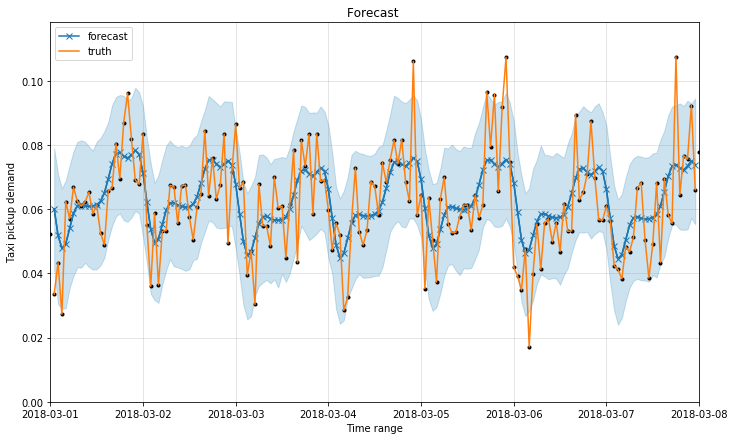

In [68]:
make_prediction_for_borough(queens_tips_exog, queens_tips_model,date1='2018-03-01', date2 = '2018-03-08')

#### Bronx

In [62]:
pkl_path = "./models/bronx_tips.pkl"
with open(pkl_path, 'rb') as f:
    bronx_tips_model = pickle.load(f)

In [63]:
bronx_tips_exog = pd.read_csv("./models/bronx_tips_exog.csv", parse_dates = ['ds'])

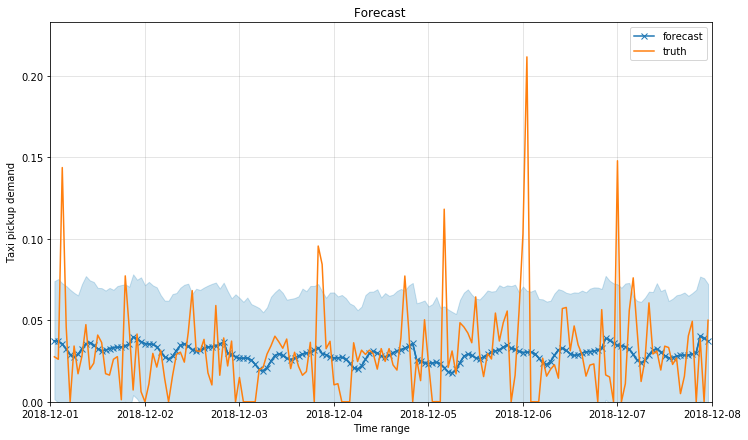

In [65]:
make_prediction_for_borough(bronx_tips_exog, bronx_tips_model,date1='2018-12-01', date2 = '2018-12-08')

### Trip by borough

#### Manhattan

In [69]:
pkl_path = "./models/manhattan_trip.pkl"
with open(pkl_path, 'rb') as f:
    manhattan_trip_model = pickle.load(f)

In [70]:
manhattan_trip_exog = pd.read_csv("./models/manhattan_trip_exog.csv", parse_dates = ['ds'])

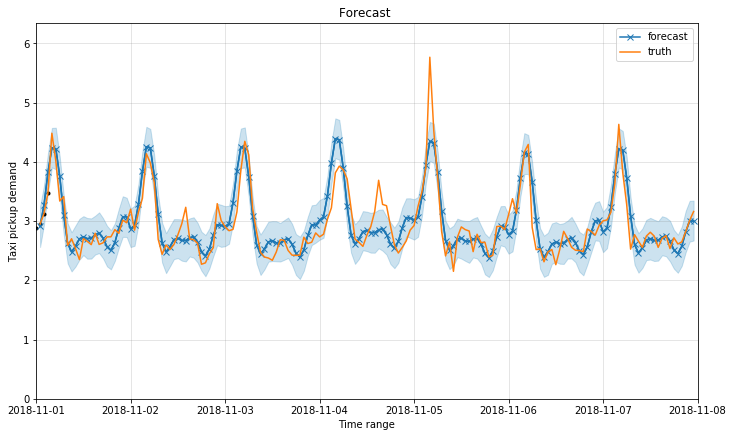

In [72]:
make_prediction_for_borough(manhattan_trip_exog, manhattan_trip_model,date1='2018-11-01', date2 = '2018-11-08')

#### Brooklyn

In [73]:
pkl_path = "./models/brooklyn_trip.pkl"
with open(pkl_path, 'rb') as f:
    brooklyn_trip_model = pickle.load(f)

In [74]:
brooklyn_trip_exog = pd.read_csv("./models/brooklyn_trip_exog.csv", parse_dates = ['ds'])

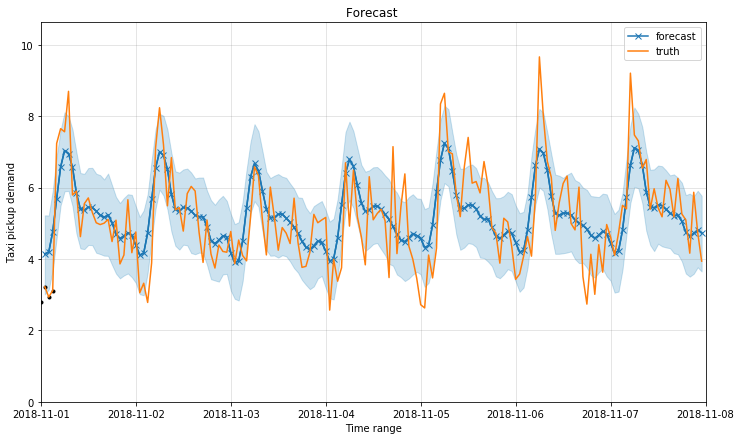

In [75]:
make_prediction_for_borough(brooklyn_trip_exog, brooklyn_trip_model,date1='2018-11-01', date2 = '2018-11-08')

#### Queens

In [76]:
pkl_path = "./models/queens_trip.pkl"
with open(pkl_path, 'rb') as f:
    queens_trip_model = pickle.load(f)

In [77]:
queens_trip_exog = pd.read_csv("./models/queens_trip_exog.csv", parse_dates = ['ds'])

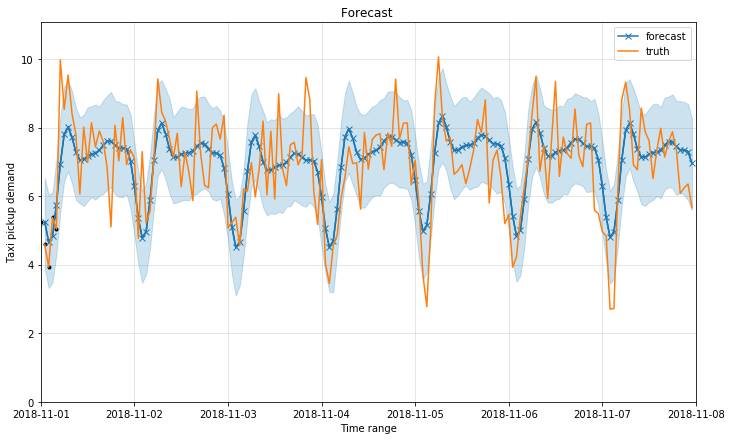

In [78]:
make_prediction_for_borough(queens_trip_exog, queens_trip_model,date1='2018-11-01', date2 = '2018-11-08')

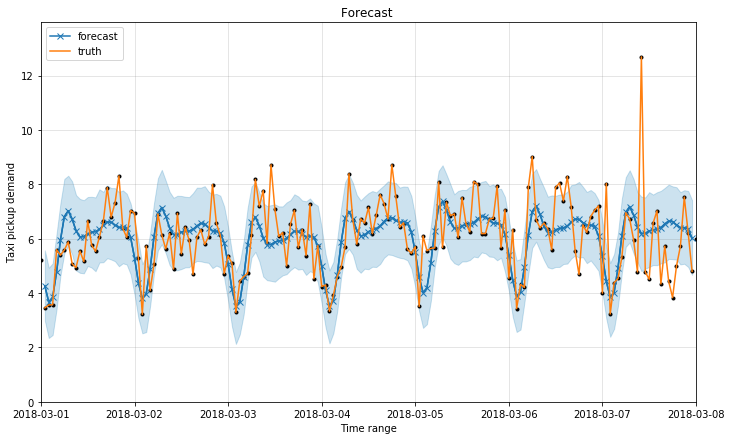

In [82]:
make_prediction_for_borough(queens_trip_exog, queens_trip_model,date1='2018-03-01', date2 = '2018-03-08')

#### Bronx

In [79]:
pkl_path = "./models/bronx_trip.pkl"
with open(pkl_path, 'rb') as f:
    bronx_trip_model = pickle.load(f)

In [80]:
bronx_trip_exog = pd.read_csv("./models/bronx_trip_exog.csv", parse_dates = ['ds'])

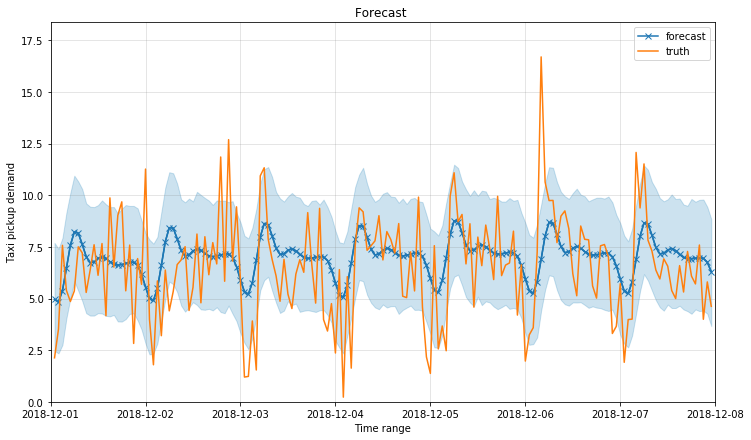

In [81]:
make_prediction_for_borough(bronx_trip_exog, bronx_trip_model,date1='2018-12-01', date2 = '2018-12-08')

## Neighborhoods predictions

### Manhattan

In [104]:
manhattan_neigh_demand = pd.read_csv("./models/manhattan_neigh_demand.csv", parse_dates = ['ds'], index_col ='ds')

In [105]:
manhattan_neigh_demand.head()

,4,13,24,41,42,43,45,48,50,68,...,236,237,238,239,243,246,249,261,262,263
ds,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,87.0,63.0,71.0,94.0,43.0,399.0,57.0,673.0,251.0,495.0,...,432.0,593.0,402.0,571.0,56.0,200.0,427.0,33.0,181.0,462.0
2018-01-01 01:00:00,154.0,95.0,76.0,115.0,69.0,229.0,31.0,800.0,349.0,508.0,...,366.0,590.0,411.0,618.0,101.0,260.0,344.0,70.0,156.0,596.0
2018-01-01 02:00:00,153.0,45.0,36.0,138.0,91.0,106.0,57.0,862.0,339.0,392.0,...,236.0,284.0,253.0,380.0,108.0,211.0,279.0,81.0,94.0,442.0
2018-01-01 03:00:00,101.0,23.0,27.0,60.0,46.0,48.0,28.0,665.0,142.0,411.0,...,95.0,124.0,157.0,185.0,80.0,218.0,391.0,27.0,53.0,333.0
2018-01-01 04:00:00,77.0,17.0,33.0,50.0,38.0,8.0,18.0,518.0,93.0,294.0,...,34.0,58.0,100.0,101.0,54.0,203.0,287.0,18.0,24.0,225.0


In [130]:
manhattan_forecasts_12 = pd.read_csv("./models/manhattan_neigh_demand_forecast_date_12.csv", parse_dates = ['ds'], index_col = 'ds')

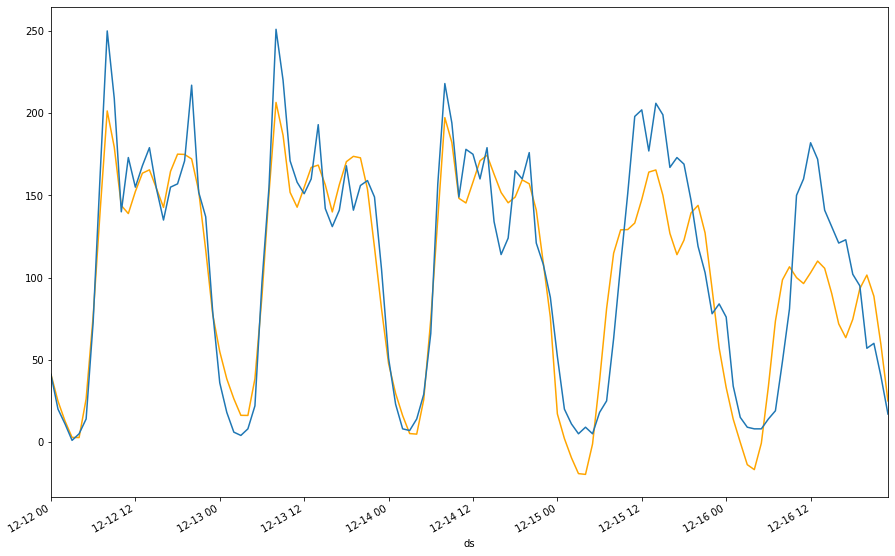

In [132]:
plt.figure(figsize = (15,10))
plt.plot(manhattan_neigh_demand['2018-12-12':'2018-12-16'].index, manhattan_forecasts_12['2018-12-12':'2018-12-16']['13'], color='orange')
manhattan_neigh_demand['2018-12-12':'2018-12-16']['13'].plot()

### Queens

In [117]:
queens_neigh_demand = pd.read_csv("./models/queens_neigh_demand.csv", parse_dates = ['ds'], index_col ='ds')

In [119]:
queens_neigh_demand.head()

,7,9,10,70,95,98,129,130,132,138,...,146,179,191,193,198,215,216,223,226,260
ds,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,41.0,2.0,0.0,3.0,6.0,1.0,15.0,2.0,174.0,67.0,...,21.0,13.0,1.0,10.0,8.0,2.0,3.0,15.0,9.0,10.0
2018-01-01 01:00:00,100.0,4.0,1.0,4.0,15.0,1.0,37.0,0.0,133.0,8.0,...,29.0,38.0,0.0,8.0,39.0,2.0,2.0,35.0,31.0,19.0
2018-01-01 02:00:00,133.0,1.0,0.0,6.0,19.0,1.0,32.0,1.0,33.0,0.0,...,28.0,33.0,0.0,8.0,78.0,0.0,1.0,40.0,54.0,46.0
2018-01-01 03:00:00,107.0,3.0,1.0,1.0,19.0,2.0,69.0,1.0,26.0,0.0,...,33.0,20.0,2.0,6.0,38.0,1.0,1.0,18.0,39.0,30.0
2018-01-01 04:00:00,106.0,3.0,1.0,4.0,22.0,5.0,57.0,0.0,40.0,7.0,...,29.0,23.0,0.0,9.0,62.0,0.0,5.0,21.0,64.0,41.0


In [124]:
queens_forecasts_12 = pd.read_csv("./models/queens_neigh_demand_forecast_date_12.csv", parse_dates = ['ds'], index_col = 'ds')

In [126]:
queens_forecasts_12.head()

,7,9,10,70,95,98,129,130,132,138,...,146,179,191,193,198,215,216,223,226,260
ds,,,,,,,,,,,,,,,,,,,,,
2018-11-01 00:00:00,17.808621,1.517196,2.237917,0.918137,4.699346,1.983642,4.892270,1.271712,303.403754,211.874961,...,10.398675,3.661734,2.713241,4.875061,5.420199,0.776450,3.210927,4.025118,13.638477,5.426144
2018-11-01 01:00:00,17.907752,1.381255,1.131896,0.531746,3.290449,1.609701,6.106976,0.914974,166.499460,69.653729,...,7.454386,3.137909,2.182513,3.996262,6.272592,0.321029,2.580197,2.723537,11.253333,5.404195
2018-11-01 02:00:00,15.753726,1.199810,0.477788,0.304446,1.667595,1.124652,7.287132,0.687253,51.487186,-3.967965,...,4.615368,1.998060,1.891706,2.900055,6.753420,0.113510,2.206666,1.169175,7.930690,4.757936
2018-11-01 03:00:00,13.569297,1.074439,0.554467,0.448652,0.882278,0.960455,8.405763,0.715777,7.326361,-17.715045,...,3.493085,1.503192,2.058129,2.656786,6.989759,0.265352,2.428450,0.717064,7.428009,5.071372
2018-11-01 04:00:00,13.844069,1.138225,1.316233,0.950341,1.515706,1.420200,9.251364,0.960836,45.456954,-9.573593,...,4.497879,3.012199,2.758798,4.075055,7.205582,0.662689,3.281121,2.179457,12.372144,7.511056


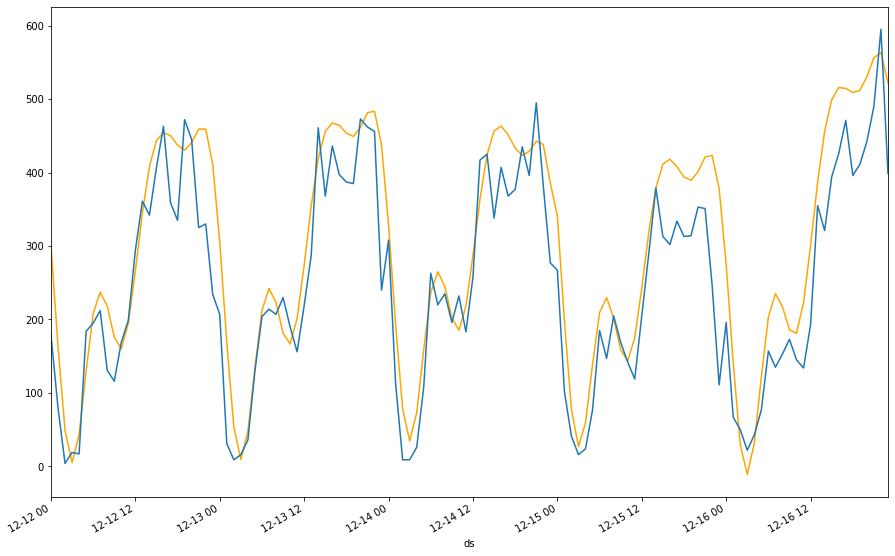

In [128]:
plt.figure(figsize = (15,10))
plt.plot(queens_neigh_demand['2018-12-12':'2018-12-16'].index, queens_forecasts_12['2018-12-12':'2018-12-16']['132'], color='orange')
queens_neigh_demand['2018-12-12':'2018-12-16']['132'].plot()

### Brooklyn

In [133]:
brooklyn_neigh_demand = pd.read_csv("./models/brooklyn_neigh_demand.csv", parse_dates = ['ds'], index_col ='ds')

In [135]:
brooklyn_neigh_demand.head()

,14,17,25,33,37,40,49,54,55,61,...,80,89,97,106,112,181,189,228,255,256
ds,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,2.0,7.0,18.0,11.0,19.0,7.0,7.0,5.0,1.0,7.0,...,24.0,2.0,5.0,3.0,15.0,24.0,8.0,8.0,41.0,32.0
2018-01-01 01:00:00,2.0,17.0,53.0,25.0,67.0,33.0,23.0,13.0,2.0,20.0,...,73.0,10.0,40.0,16.0,65.0,61.0,21.0,19.0,96.0,77.0
2018-01-01 02:00:00,5.0,22.0,38.0,12.0,110.0,18.0,24.0,12.0,0.0,20.0,...,78.0,6.0,27.0,9.0,64.0,69.0,18.0,21.0,117.0,99.0
2018-01-01 03:00:00,6.0,20.0,20.0,9.0,111.0,4.0,20.0,3.0,3.0,15.0,...,72.0,2.0,20.0,9.0,40.0,29.0,18.0,13.0,88.0,106.0
2018-01-01 04:00:00,4.0,17.0,21.0,6.0,97.0,8.0,15.0,1.0,2.0,14.0,...,60.0,2.0,10.0,8.0,28.0,19.0,8.0,11.0,73.0,56.0


In [136]:
brooklyn_forecasts = pd.read_csv("./models/brooklyn_neigh_demand_forecast_date_12.csv", parse_dates = ['ds'], index_col = 'ds')

In [137]:
brooklyn_forecasts.tail()

,14,17,25,33,37,40,49,54,55,61,...,80,89,97,106,112,181,189,228,255,256
ds,,,,,,,,,,,,,,,,,,,,,
2018-12-30 19:00:00,2.616056,2.307837,14.859217,12.410258,5.904649,3.610604,2.746451,3.483029,2.623230,3.716046,...,4.198627,3.840358,12.764515,1.566722,4.798245,13.213267,2.470073,3.753193,15.296271,8.691183
2018-12-30 20:00:00,2.705176,3.207221,15.439118,13.971443,7.006966,4.707750,4.056950,4.441734,2.565703,4.350029,...,5.562345,4.036083,16.204266,1.891449,5.952053,18.403094,3.731344,3.614957,18.564306,11.955875
2018-12-30 21:00:00,2.780784,4.406028,17.152402,14.400057,8.660366,5.444313,5.569813,4.499679,2.553296,5.181238,...,8.276933,4.204494,20.458109,2.487569,8.217690,24.606238,5.308437,3.875932,24.272692,17.190548
2018-12-30 22:00:00,2.792821,5.398284,18.859340,13.354412,10.678254,5.572420,6.637755,3.948330,2.555839,5.957132,...,11.692980,4.348246,23.361293,3.056921,10.833018,28.558827,6.424414,4.373348,30.932757,22.875162
2018-12-30 23:00:00,2.786897,5.750021,18.678520,11.305174,12.948892,5.359123,6.844433,3.606397,2.581666,6.453592,...,14.735118,4.537497,22.926121,3.256932,12.549700,27.838829,6.454436,4.795574,36.210440,27.254707


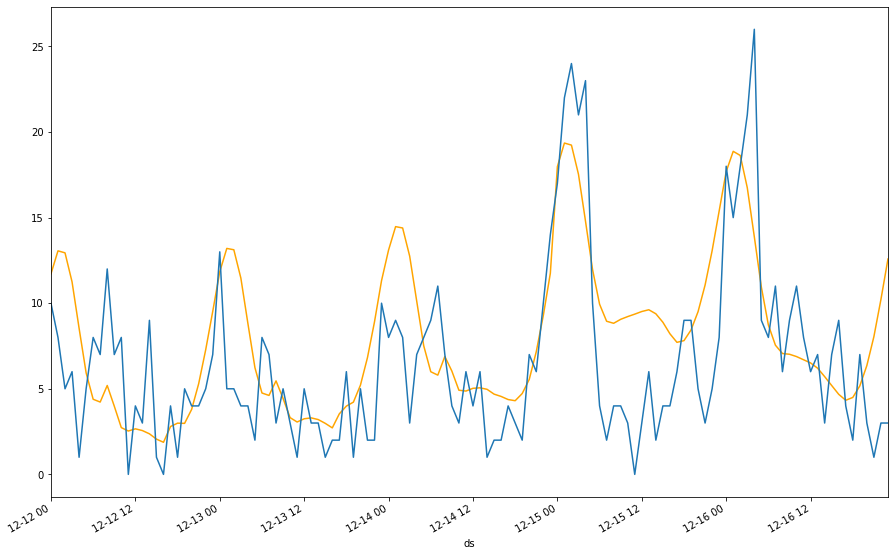

In [141]:
plt.figure(figsize = (15,10))
plt.plot(brooklyn_neigh_demand['2018-12-12':'2018-12-16'].index, brooklyn_forecasts['2018-12-12':'2018-12-16']['37'], color='orange')
brooklyn_neigh_demand['2018-12-12':'2018-12-16']['37'].plot()

In [320]:
def show_neigh_predictions(df, forecast, neigh, date_start = '2018-12-12', date_end = '2018-12-16'):
    plt.figure(figsize = (15,10))
    
    ax = plt.gca()
    plt.plot(df[date_start:date_end].index, forecast[date_start:date_end][neigh], color='orange')
    df[date_start:date_end][neigh].plot( ax = ax)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.legend()
    plt.tight_layout()
    return plt.show()

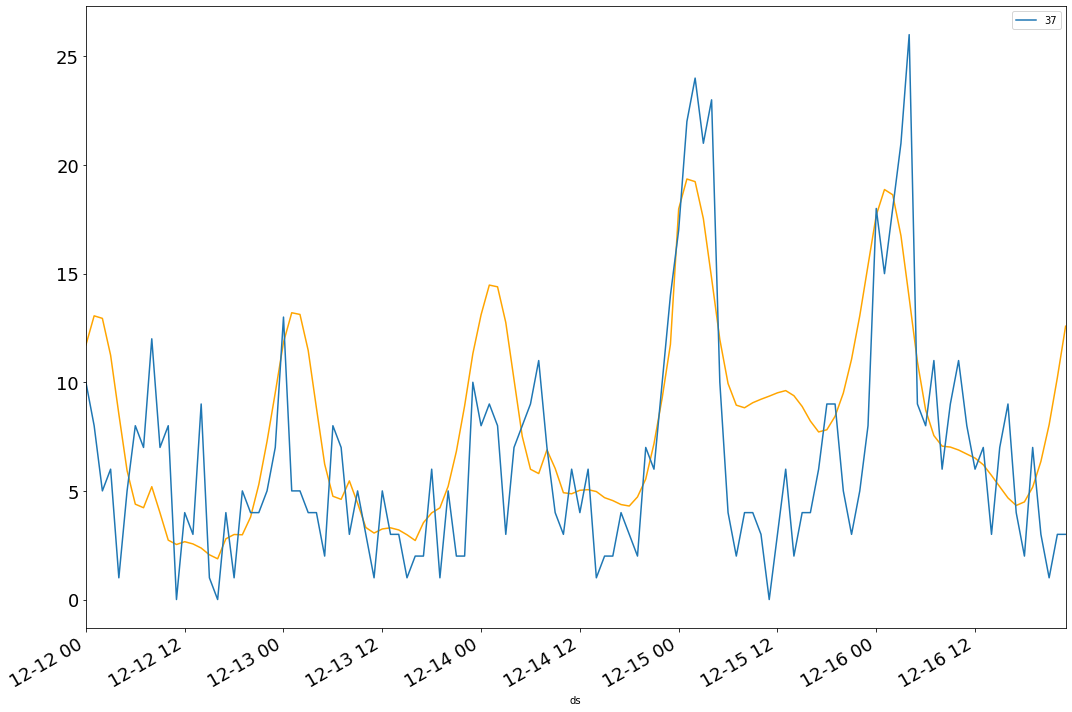

In [321]:
show_neigh_predictions(brooklyn_neigh_demand, brooklyn_forecasts, neigh = '37', date_start = '2018-12-12', date_end = '2018-12-16')